In [1]:
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file Input 

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape
#Total 10 thoustand data and 14 columns 

(10000, 14)

RowNumber CustomerId and Surname are not useful hence Dropped

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Gender and Geograph are object type we need to convert in numerical form

In [8]:
# is there any duplicate row
df.duplicated().sum()

0

There are 0 duplicated value

In [10]:
#Let us check how many customers have left the bank
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

7963 customers have left the bank

In [11]:
# Let us check how many customers are form which geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

There are less customers from Spain and more are from France 

In [12]:
#let us check how many males and how many females are there
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
#we want to convert Grography and Gender which is an object type convert into integer
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first =True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Here Geography France is Dropped and male column is Dropped

In [16]:
#Assign all features to X and Target column as Y
#Divide the data into train and test
x = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

80% data used for Training and 20% used for testing

In [17]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [19]:
x_train.shape

(8000, 11)

There are 11 columns are used for Testing and 8000 data points for training

In [20]:
#Let us make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

### Artificial Neural Network Model (ANN)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Now let us Define ANN Model
model = Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=11))

model.add(Dense(1,activation='sigmoid'))

In [24]:
# summary() ids function not property
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#input links are 3 and 11 featueres are applied, total =11x3

Let us compile the model, loss we will take binary cross entropy and for gradient desent adam optimizer is used

In [25]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [26]:
# Let us train the model
history = model.fit(x_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6083
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5115
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4777
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4610
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4583
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4564
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4495
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4326
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4331
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4407


Now let us check final weights after training

In [27]:
model.layers[0].get_weights()

[array([[-0.3929074 ,  0.152317  ,  0.0229025 ],
        [ 0.56692296, -1.8718445 , -1.2186993 ],
        [ 0.03369927, -0.04089913,  0.3445656 ],
        [-0.12784141, -0.07532801, -0.79633486],
        [ 0.0222756 ,  0.08755498,  0.05571836],
        [ 0.3087784 , -0.16118006,  0.3413257 ],
        [-1.0745552 ,  0.40504414,  0.7968635 ],
        [-0.30309898, -0.02958741, -0.18266113],
        [ 0.25993943, -0.71481705, -0.3245131 ],
        [ 0.36732638,  0.01695439,  0.13032566],
        [-0.8838293 ,  0.21417093,  0.6724288 ]], dtype=float32),
 array([-0.2349716 ,  0.38616058,  0.37005964], dtype=float32)]

In [28]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Result in the form of Probability

In [30]:
y_log

array([[0.23223479],
       [0.3445121 ],
       [0.1577897 ],
       ...,
       [0.18429875],
       [0.1235614 ],
       [0.18948749]], dtype=float32)

In [32]:
y_pred = np.where(y_log>0.5,1,0)

In [33]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8095

let us increase the number of nodes and layers also

In [35]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu', input_dim=11))

model.add(Dense(1,activation='sigmoid'))

C:\Users\Priyanka\.conda\envs\priya\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Let us train the model
history = model.fit(x_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6080 - loss: 0.6517 - val_accuracy: 0.7962 - val_loss: 0.4882
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4692 - val_accuracy: 0.7969 - val_loss: 0.4612
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8063 - loss: 0.4316 - val_accuracy: 0.7962 - val_loss: 0.4479
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4346 - val_accuracy: 0.7987 - val_loss: 0.4384
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8078 - loss: 0.4201 - val_accuracy: 0.8100 - val_loss: 0.4255
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8271 - loss: 0.3961 - val_accuracy: 0.8281 - val_loss: 0.4091
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8291 - loss: 0.3950 - val_accuracy: 0.8400 - val_loss: 0.3938
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3819 - val_accu

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8649 - loss: 0.3260 - val_accuracy: 0.8600 - val_loss: 0.3537
Epoch 52/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3256 - val_accuracy: 0.8606 - val_loss: 0.3532
Epoch 53/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 0.3313 - val_accuracy: 0.8600 - val_loss: 0.3525
Epoch 54/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3375 - val_accuracy: 0.8600 - val_loss: 0.3530
Epoch 55/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3229 - val_accuracy: 0.8600 - val_loss: 0.3526
Epoch 56/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3286 - val_accuracy: 0.8562 - val_loss: 0.3519
Epoch 57/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8611 - loss: 0.3281 - val_accuracy: 0.8600 - val_loss: 0.3558
Epoch 58/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3169 - val_accuracy:

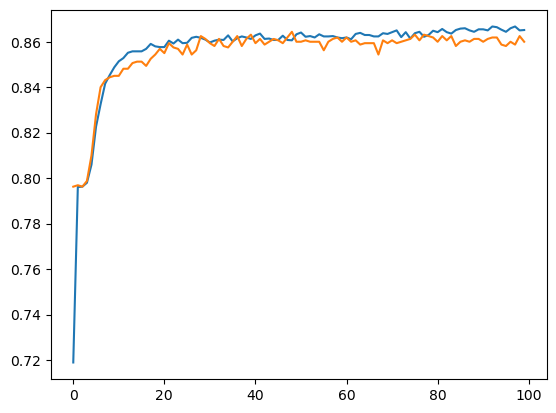

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [42]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_pred = np.where(y_log>0.5,1,0)

In [44]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

Now accuracy has een improved compare to earlier one

In [47]:
history.history

{'accuracy': [0.7189062237739563,
  0.796093761920929,
  0.7962499856948853,
  0.7979687452316284,
  0.8059375286102295,
  0.8226562738418579,
  0.8324999809265137,
  0.8415625095367432,
  0.8453124761581421,
  0.8487499952316284,
  0.8514062762260437,
  0.8528125286102295,
  0.8551562428474426,
  0.8557812571525574,
  0.8557812571525574,
  0.8557812571525574,
  0.8568750023841858,
  0.8590624928474426,
  0.8579687476158142,
  0.8576562404632568,
  0.8576562404632568,
  0.8604687452316284,
  0.8592187762260437,
  0.8609374761581421,
  0.859375,
  0.8595312237739563,
  0.8617187738418579,
  0.8621875047683716,
  0.8617187738418579,
  0.8609374761581421,
  0.8596875071525574,
  0.8604687452316284,
  0.8609374761581421,
  0.8607812523841858,
  0.8628125190734863,
  0.860156238079071,
  0.8615624904632568,
  0.8623437285423279,
  0.8618749976158142,
  0.8612499833106995,
  0.8628125190734863,
  0.8635937571525574,
  0.8612499833106995,
  0.8614062666893005,
  0.8607812523841858,
  0.860781

Just drag the above output you will find accuracy loss, validation_accuracy and validation_loss

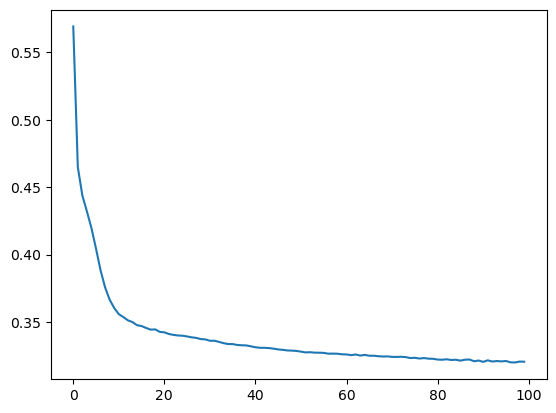

In [48]:
plt.plot(history.history['loss'])

you can see how loss is decreased 

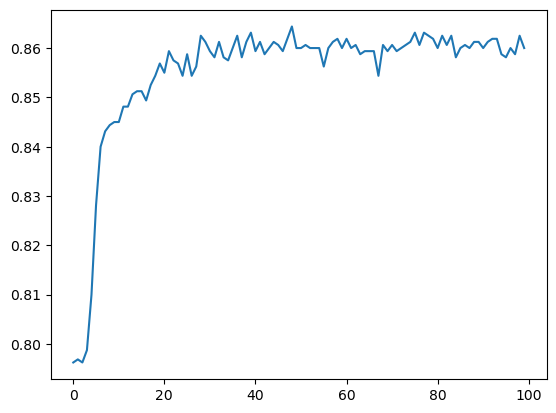

In [49]:
plt.plot(history.history['val_accuracy'])

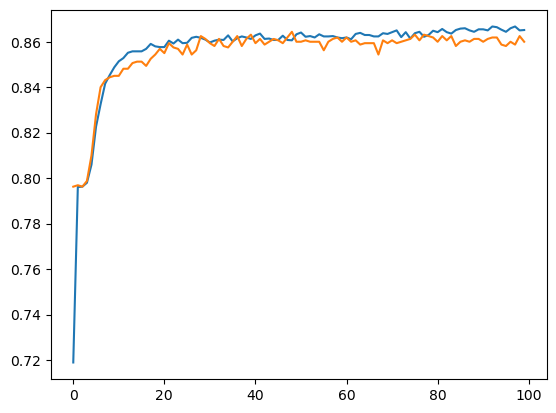

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])